In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import fileinput

print(f"TensorFlow version = {tf.__version__}\n")

TensorFlow version = 2.12.0



In [2]:
# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

CLASSES = [];

for file in os.listdir("/content/"):
    if file.endswith(".csv"):
        CLASSES.append(os.path.splitext(file)[0])

CLASSES.sort()

SAMPLES_WINDOW_LEN = 1
NUM_CLASSES = len(CLASSES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_CLASSES = np.eye(NUM_CLASSES)

fire class will be output 0 of the classifier
158 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



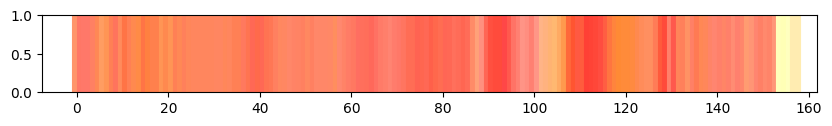

room class will be output 1 of the classifier
306 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



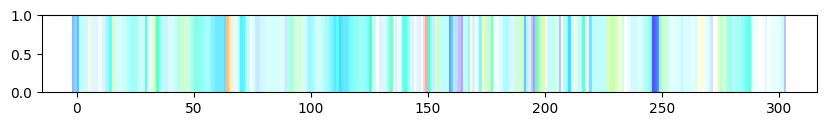

Data set parsing and preparation complete.


In [3]:
inputs = []
outputs = []

# read each csv file and push an input and output
for class_index in range(NUM_CLASSES):
  objectClass = CLASSES[class_index]
  df = pd.read_csv("/content/" + objectClass + ".csv")
  columns = list(df)
  # get rid of pesky empty value lines of csv which cause NaN inputs to TensorFlow
  df = df.dropna()
  df = df.reset_index(drop=True)
   
  # calculate the number of objectClass recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_WINDOW_LEN)
  print(f"\u001b[32;4m{objectClass}\u001b[0m class will be output \u001b[32m{class_index}\u001b[0m of the classifier")
  print(f"{num_recordings} samples captured for training with inputs {list(df)} \n")

  # graphing
  plt.rcParams["figure.figsize"] = (10,1)
  pixels = np.array([df['Red'],df['Green'],df['Blue']],float)
  pixels = np.transpose(pixels)
  for i in range(num_recordings):
    plt.axvline(x=i, linewidth=8, color=tuple(pixels[i]/np.max(pixels[i], axis=0)))
  plt.show()
  
  #tensors
  output = ONE_HOT_ENCODED_CLASSES[class_index]
  for i in range(num_recordings):
    tensor = []
    row = []
    for c in columns:
      row.append(df[c][i])
    tensor += row
    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

In [4]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [5]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')) # softmax is used, because we only expect one class to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=500, batch_size=4, validation_data=(inputs_validate, outputs_validate))

Epoch 1/500
70/70 [==============================] - 1s 6ms/step - loss: 0.2432 - mae: 0.4879 - val_loss: 0.2292 - val_mae: 0.4691
Epoch 2/500
70/70 [==============================] - 0s 3ms/step - loss: 0.2229 - mae: 0.4607 - val_loss: 0.2117 - val_mae: 0.4459
Epoch 3/500
70/70 [==============================] - 0s 3ms/step - loss: 0.2088 - mae: 0.4429 - val_loss: 0.1979 - val_mae: 0.4259
Epoch 4/500
70/70 [==============================] - 0s 3ms/step - loss: 0.1965 - mae: 0.4254 - val_loss: 0.1830 - val_mae: 0.4108
Epoch 5/500
70/70 [==============================] - 0s 3ms/step - loss: 0.1814 - mae: 0.4092 - val_loss: 0.1664 - val_mae: 0.3905
Epoch 6/500
70/70 [==============================] - 0s 3ms/step - loss: 0.1655 - mae: 0.3889 - val_loss: 0.1492 - val_mae: 0.3718
Epoch 7/500
70/70 [==============================] - 0s 6ms/step - loss: 0.1480 - mae: 0.3693 - val_loss: 0.1301 - val_mae: 0.3455
Epoch 8/500
70/70 [==============================] - 1s 8ms/step - loss: 0.1249 - m

In [6]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

3/3 [==============================] - 0s 4ms/step
predictions =
 [[0.998 0.002]
 [0.001 0.999]
 [1.    0.   ]
 [0.063 0.937]
 [0.998 0.002]
 [0.126 0.874]
 [0.993 0.007]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.009 0.991]
 [0.996 0.004]
 [0.001 0.999]
 [0.994 0.006]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.997 0.003]
 [0.997 0.003]
 [0.    1.   ]
 [0.002 0.998]
 [0.997 0.003]
 [0.    1.   ]
 [0.999 0.001]
 [0.001 0.999]
 [0.    1.   ]
 [0.995 0.005]
 [0.001 0.999]
 [0.998 0.002]
 [0.001 0.999]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.01  0.99 ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.999 0.001]
 [0.998 0.002]
 [0.997 0.003]
 [0.    1.   ]
 [0.997 0.003]
 [0.    1.   ]
 [0.    1.   ]
 [0.996 0.004]
 [0.998 0.002]
 [0.    1.   ]
 [0.998 0.002]
 [0.005 0.995]
 [0.999 0.001]
 [0.983 0.017]
 [0.001 0.999]
 [0.    1.   ]
 [0.003 0.997]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.997 0.003]
 [0.

In [7]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("fire.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("fire.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 2448 bytes


In [8]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

cat: gesture_model.tflite: No such file or directory
Header file, model.h, is 35 bytes.
